In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load your CSV
df = pd.read_csv('data_sets\ecg_train1.csv')

# Split features and labels
X = df.iloc[:, :120].values  # first 100 columns
y = df.iloc[:, -1].values   # last column is label

# Normalize ECG signals (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")

# Reshape for 1D CNN: (samples, time steps, 1 channel)
X = X[..., np.newaxis]  # shape: (samples, signal_length, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
C:\Users\acer\AppData\Local\Temp\ipykernel_20656\2514984630.py:8: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv('data_sets\ecg_train1.csv')


Scaler saved as 'scaler.pkl'


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please upd

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 118, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 59, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 57, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,153 (473.25 KB)

 Trainable params: 121,153 (473.25 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Shuffle before splitting
indices = np.arange(len(X_train))
np.random.shuffle(indices)

X_train = X_train[indices]
y_train = y_train[indices]

history = model.fit(X_train, y_train, epochs=20, batch_size=32, shuffle = True, validation_split=0.1)

Epoch 1/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8204 - loss: 0.3770 - val_accuracy: 0.8855 - val_loss: 0.2676
Epoch 2/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9108 - loss: 0.2280 - val_accuracy: 0.9254 - val_loss: 0.1820
Epoch 3/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9423 - loss: 0.1550 - val_accuracy: 0.9567 - val_loss: 0.1206
Epoch 4/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9601 - loss: 0.1156 - val_accuracy: 0.9686 - val_loss: 0.0906
Epoch 5/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9695 - loss: 0.0915 - val_accuracy: 0.9763 - val_loss: 0.0697
Epoch 6/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9762 - loss: 0.0726 - val_accuracy: 0.9813 - val_loss: 0.0557
Epoch 7/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0595 - val_accuracy: 0.9771 - val_loss: 0.0592
Epoch 8/20
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9820 - loss: 0.0535 - val_accuracy: 0.

In [4]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")


 1/93 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 1.0000 - loss: 0.0253

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9902 - loss: 0.0434
Test accuracy: 0.99


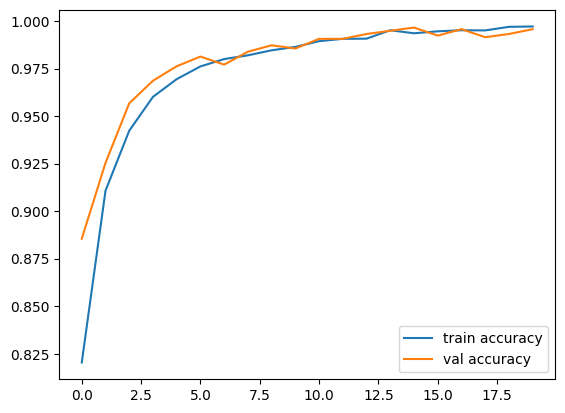

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [ ]:
# Load CSV as strings first
new_df = pd.read_csv(r"data_sets\ecg_test.csv", header=None, dtype=str)

processed_signals = []
target_len = 120  # same length as used in training

for idx, row in new_df.iterrows():
    # Convert row to numeric, replace bad values with 0
    signal = pd.to_numeric(row, errors='coerce').fillna(0).values.flatten()
    
    # Pad or truncate to target length
    if len(signal) < target_len:
        signal = np.pad(signal, (0, target_len - len(signal)), mode='constant')
    elif len(signal) > target_len:
        signal = signal[:target_len]
    
    processed_signals.append(signal)

# Stack all signals for CNN input
new_X = np.stack(processed_signals)

# Normalize with the same scaler used in training
new_X = scaler.transform(new_X)

# Reshape for CNN (samples, signal_length, 1)
new_X = new_X[..., np.newaxis]

# Predict
predictions = model.predict(new_X)
predicted_labels = (predictions > 0.5).astype(int)

# Show predictions
for i, p in enumerate(predicted_labels):
    print(f"ECG {i+1}: {'Abnormal' if p[0] == 1 else 'Normal'}")

# Save the model
tf.saved_model.save(model, "saved_model")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
ECG 1: Abnormal
ECG 2: Abnormal
ECG 3: Normal
ECG 4: Normal
ECG 5: Abnormal


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf